In [1]:
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [3]:
# This cell updates result list for images with tumor
data = []
paths = []
result = []

In [4]:
for r, d, f in os.walk(r'./Brain_Tumor_Dataset/Negative'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
        elif ".jpeg" in file:
            paths.append(os.path.join(r, file))
        elif ".JPG" in file:
            paths.append(os.path.join(r, file))
 
total_paths = len(paths)
progress_bar = tqdm(total=total_paths, desc="Process")
 
for path in paths:
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if img.shape == (227, 227, 3):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        flipped_img = np.flip(img, 1)
        data.append(flipped_img)
        result.append(encoder.transform([[0]]).toarray())
    progress_bar.update(1)
    
progress_bar.close()
    
len(data)


Process: 100%|██████████| 2000/2000 [00:11<00:00, 170.29it/s]


3934

In [5]:
paths = []
skipped_paths=[]

for r, d, f in os.walk(r"./Brain_Tumor_Dataset/Positive"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
        elif ".jpeg" in file:
            paths.append(os.path.join(r, file))
        elif ".JPG" in file:
            paths.append(os.path.join(r, file))

total_paths = len(paths)
progress_bar = tqdm(total=total_paths, desc="Process")

for path in paths:
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if img.shape == (227, 227, 3):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        #flipped_img = np.flip(img, 1)
        #data.append(flipped_img)
        #result.append(encoder.transform([[1]]).toarray())
        #flip = np.transpose(img)
        #data.append(flip)
        #result.append(encoder.transform([[1]]).toarray())
    else:
        skipped_paths.append(path)
    progress_bar.update(1)

print("Skipped image paths:")
for path in skipped_paths:
    print(path)
    img = Image.open(path)
    img = np.array(img)
    img=np.resize(img,(227,227,3))
    print(img.size)
    
len(data)


Process: 100%|█████████▉| 3250/3266 [00:11<00:00, 444.21it/s]

Skipped image paths:
./Brain_Tumor_Dataset/Positive\Te-gl_0074.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0075.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0076.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0077.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0078.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0079.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0080.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0081.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0082.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0083.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0084.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0085.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0086.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0087.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0088.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0089.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0090.jpg
154587
./Brain_Tumor_Dataset/Positive\Te-gl_0091.jpg
154587
./Brain_Tumor_Dataset/Pos

5066

In [6]:
data = np.array(data)
print(data.shape)

(5066, 227, 227, 3)


In [7]:
result = np.array(result)
result = result.reshape(5066,2)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:
from keras.layers import Dropout

model = Sequential()

# First Convolutional layer with 64 filters, kernel size of 3x3, input shape of (128, 128, 3), and stride of (2,2)
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(227, 227, 3), strides=(4,4), activation='relu'))

# Second Convolutional layer with 64 filters and kernel size of 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Max Pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional layer with 128 filters, kernel size of 3x3, and stride of (2,2)
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', strides=(4,4)))

# Fourth Convolutional layer with 128 filters and kernel size of 3x3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', strides=(4,4)))

# Max Pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 2D feature maps to a 1D feature vector
model.add(Flatten())

# Fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 2 units and softmax activation for binary classification
model.add(Dense(2, activation='softmax'))

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 128)         147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 128)         0         
 g2D)                                                   

In [10]:
y_test.shape

(1014, 2)

In [11]:
x_train.shape

(4052, 227, 227, 3)

In [12]:
history = model.fit(x_train, y_train, epochs=100, batch_size=40, verbose=1, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
92/92 [==============================] - 47s 488ms/step - loss: 0.5325 - accuracy: 0.8478 - val_loss: 0.1888 - val_accuracy: 0.9335
Epoch 2/100
92/92 [==============================] - 45s 492ms/step - loss: 0.1965 - accuracy: 0.9284 - val_loss: 0.1949 - val_accuracy: 0.9483
Epoch 3/100
92/92 [==============================] - 47s 514ms/step - loss: 0.1360 - accuracy: 0.9547 - val_loss: 0.1308 - val_accuracy: 0.9581
Epoch 4/100
92/92 [==============================] - 48s 527ms/step - loss: 0.0955 - accuracy: 0.9641 - val_loss: 0.1241 - val_accuracy: 0.9754
Epoch 5/100
92/92 [==============================] - 51s 557ms/step - loss: 0.0946 - accuracy: 0.9698 - val_loss: 0.0918 - val_accuracy: 0.9729
Epoch 6/100
92/92 [==============================] - 51s 557ms/step - loss: 0.0585 - accuracy: 0.9786 - val_loss: 0.1073 - val_accuracy: 0.9754
Epoch 7/100
92/92 [==============================] - 48s 518ms/step - loss: 0.0336 - accuracy: 0.9885 - val_loss: 0.1464 - val_accuracy:

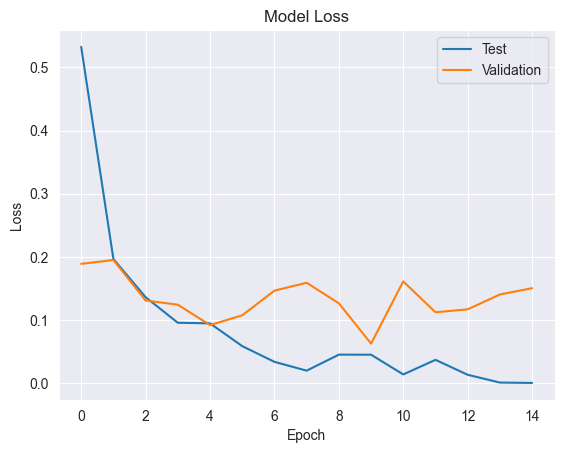

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

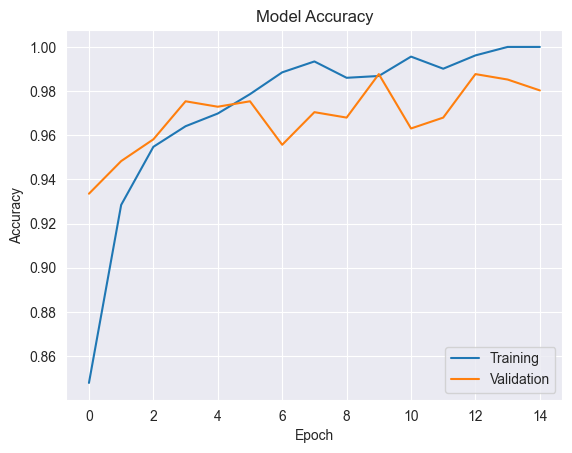

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [15]:
# Evaluate the model
test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

32/32 [==============================] - 5s 146ms/step - loss: 0.1148 - accuracy: 0.9773
Test Loss: [0.11484656482934952, 0.9773175716400146]


In [16]:
from sklearn.metrics import accuracy_score
# x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)
# Predict probabilities for test set
print(x_train.shape)
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)

y_true = np.argmax(y_test, axis=1)
# Compute test accuracy
test_accuracy = accuracy_score(y_true, y_pred)

print("Test Accuracy:", test_accuracy*100)

(4052, 227, 227, 3)
32/32 [==============================] - 4s 116ms/step
[1 0 0 ... 1 0 0]
Test Accuracy: 97.73175542406311


In [17]:
from sklearn.metrics import f1_score

# Compute F1-score
f1 = f1_score(y_true, y_pred)
print(y_pred)

print("F1 Score:", f1)

[1 0 0 ... 1 0 0]
F1 Score: 0.9507494646680942


In [18]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

32/32 [==============================] - 4s 116ms/step


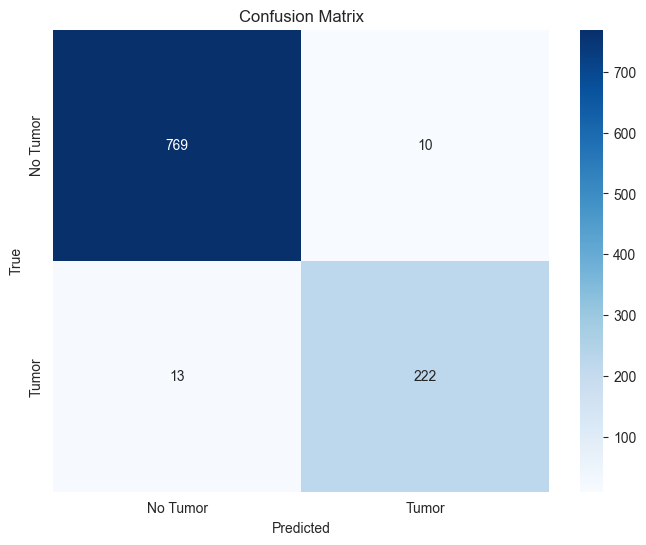

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
# y_pred is not working, its giving zeros ka matrix 
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Tumor', 'Tumor'], 
            yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()